# Day 5: Traffic Spike Forecasting

In this notebook, we'll use simulated historical HTTP request counts to forecast the next 24 hours of traffic using Facebook Prophet. All computation is local and incurs no cloud cost.

Steps:
1. Simulate historical HTTP request data.
2. Train Prophet model.
3. Forecast next 24 hours.
4. Visualize predictions vs. real data.

In [15]:
# Install required libraries (Prophet, pandas, matplotlib)
!pip install prophet pandas matplotlib --quiet
!pip install plotly nbformat --quiet

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

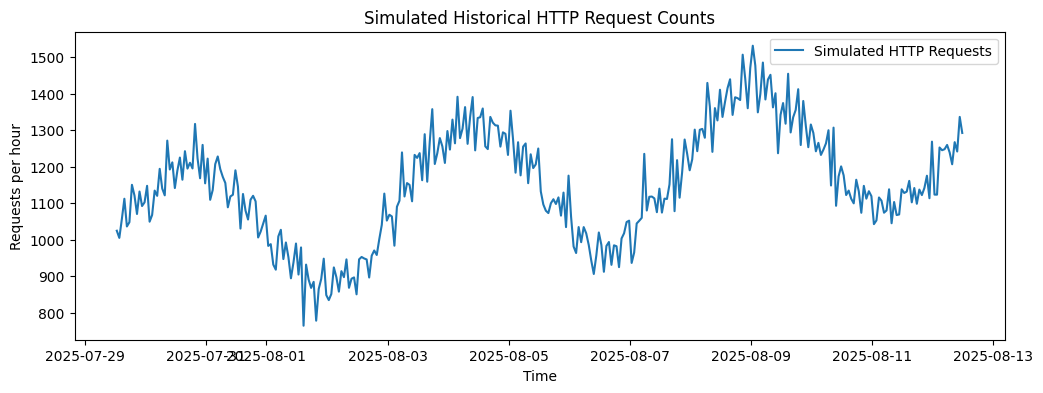

In [17]:
# Simulate historical HTTP request data (hourly for past 14 days)
np.random.seed(42)
dates = pd.date_range(end=pd.Timestamp.now(), periods=14*24, freq='h')
base = 1000 + 200 * np.sin(np.linspace(0, 6*np.pi, len(dates)))
trend = np.linspace(0, 300, len(dates))
noise = np.random.normal(0, 50, len(dates))
requests = base + trend + noise
df = pd.DataFrame({'ds': dates, 'y': requests})

# Plot simulated data
plt.figure(figsize=(12,4))
plt.plot(df['ds'], df['y'], label='Simulated HTTP Requests')
plt.title('Simulated Historical HTTP Request Counts')
plt.xlabel('Time')
plt.ylabel('Requests per hour')
plt.legend()
plt.show()

- It uses a combination of a base value, a sinusoidal pattern (to mimic daily cycles), a linear trend (to simulate growth), and random noise.
- The resulting DataFrame `df` contains timestamps (`ds`) and request counts (`y`).
- The plot shows the simulated request counts over time:
  - **X-axis:** Time (hourly intervals for 14 days)
  - **Y-axis:** Number of HTTP requests per hour
  - **Interpretation:** You should see periodic spikes and dips (daily cycles), a slight upward trend, and some randomness. This mimics real-world traffic patterns.

In [18]:
# Prepare and train Prophet model
model = Prophet()
model.fit(df)

11:42:30 - cmdstanpy - INFO - Chain [1] start processing
11:42:30 - cmdstanpy - INFO - Chain [1] done processing
11:42:30 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# Forecast next 24 hours
future = model.make_future_dataframe(periods=24, freq='h')
forecast = model.predict(future)

# Show forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
336,2025-08-12 12:42:30.213724,1171.871038,995.975511,1336.670183
337,2025-08-12 13:42:30.213724,1157.649186,997.300872,1313.612443
338,2025-08-12 14:42:30.213724,1148.498136,983.014740,1311.197081
339,2025-08-12 15:42:30.213724,1150.476558,985.288166,1311.110853
340,2025-08-12 16:42:30.213724,1158.876315,993.109953,1324.968972
341,2025-08-12 17:42:30.213724,1163.931404,1001.580396,1315.720769
342,2025-08-12 18:42:30.213724,1161.384723,998.143042,1321.323255
343,2025-08-12 19:42:30.213724,1156.641818,985.671850,1317.664539
344,2025-08-12 20:42:30.213724,1158.140815,989.333162,1326.743612
345,2025-08-12 21:42:30.213724,1167.040891,1004.248915,1323.243201


- The output table shows the predicted values (`yhat`) and confidence intervals (`yhat_lower`, `yhat_upper`) for each hour in the forecast period.
- **Interpretation:** These are the expected traffic volumes for the next day, with uncertainty bounds.

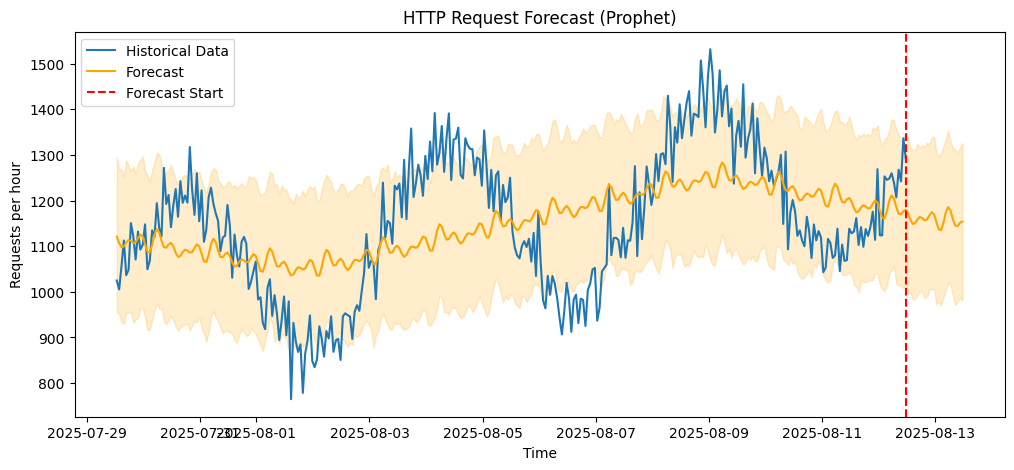

In [20]:
# Visualize predictions vs. real data
plt.figure(figsize=(12,5))
plt.plot(df['ds'], df['y'], label='Historical Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
plt.axvline(df['ds'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.title('HTTP Request Forecast (Prophet)')
plt.xlabel('Time')
plt.ylabel('Requests per hour')
plt.legend()
plt.show()

- **Blue line:** Historical HTTP request counts (from your simulation)
- **Orange line:** Prophet's forecast for all timestamps (including the next 24 hours)
- **Shaded region:** Confidence interval for the forecast
- **Red dashed line:** Marks the point where the forecast begins (end of historical data)
- **Interpretation:**  
  - You can visually compare the model's predictions to the historical pattern.
  - The forecast should continue the trend and cycles seen in the historical data.
  - The confidence interval shows the range of plausible future values.
  

## Alternative Graph Visualizations

Other visualizations to compare historical and forecasted data include:

- **Scatter Plot:** Shows individual data points for both actual and predicted values, useful for spotting outliers.
- **Bar Chart:** Useful for comparing hourly totals side-by-side, especially for short time windows.
- **Residual Plot:** Plots the difference between actual and predicted values to highlight model errors.
- **Interactive Plot (Plotly):** Allows zooming and hovering to inspect specific points and intervals.
- **Overlayed Line Plot (current):** Best for showing trends and seasonality over time.

Choose the visualization based on what aspect of the forecast you want to analyze (trend, error, distribution, etc.).

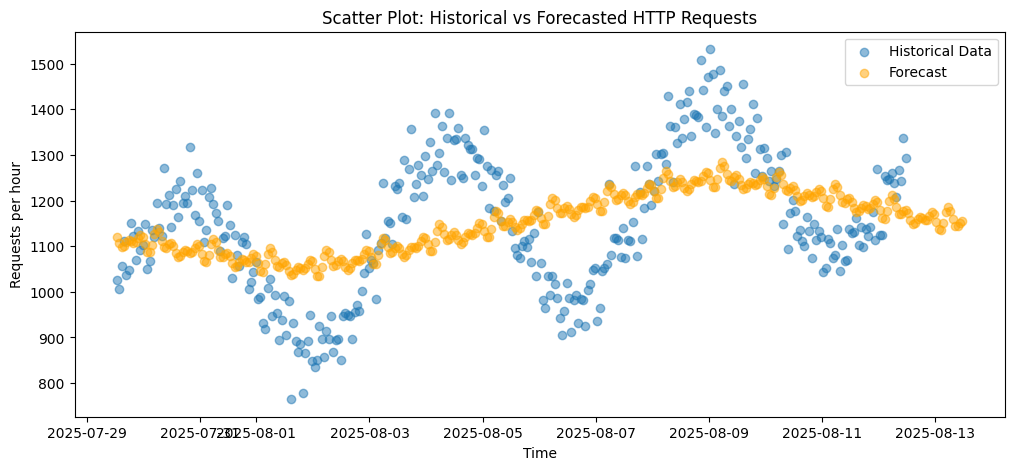

In [21]:
# Scatter Plot: Historical vs Forecasted values
plt.figure(figsize=(12,5))
plt.scatter(df['ds'], df['y'], label='Historical Data', alpha=0.5)
plt.scatter(forecast['ds'], forecast['yhat'], label='Forecast', color='orange', alpha=0.5)
plt.title('Scatter Plot: Historical vs Forecasted HTTP Requests')
plt.xlabel('Time')
plt.ylabel('Requests per hour')
plt.legend()
plt.show()

**Scatter Plot Explanation:**

This scatter plot displays individual data points for both historical and forecasted HTTP requests. Unlike the time series line plot, which emphasizes trends and continuity, the scatter plot helps identify outliers, clusters, and the spread of data. It is useful for visually comparing the distribution and variability of actual versus predicted values at each timestamp.

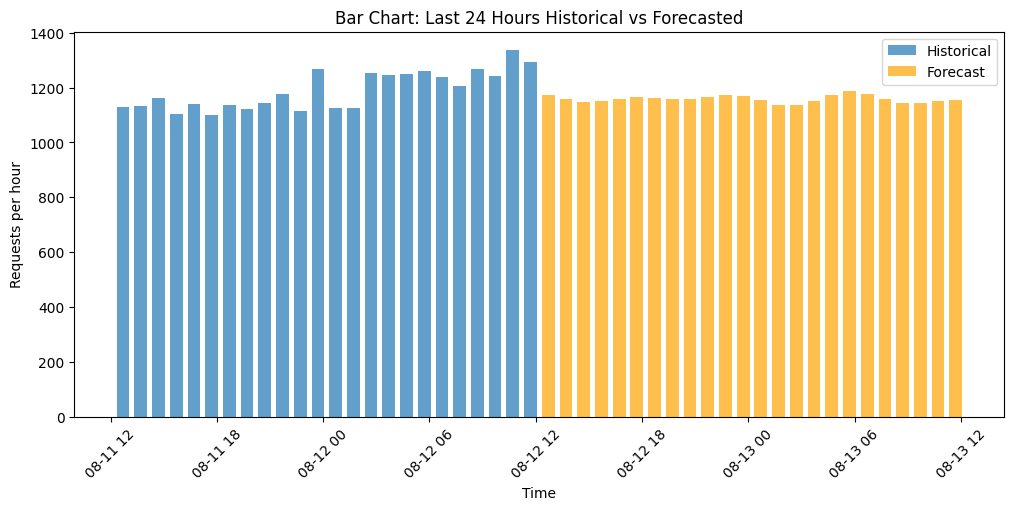

In [22]:
# Bar Chart: Last 24 hours historical vs forecasted
plt.figure(figsize=(12,5))
hist_last24 = df.tail(24)
forecast_last24 = forecast.tail(24)
plt.bar(hist_last24['ds'], hist_last24['y'], width=0.03, label='Historical', alpha=0.7)
plt.bar(forecast_last24['ds'], forecast_last24['yhat'], width=0.03, label='Forecast', alpha=0.7, color='orange')
plt.title('Bar Chart: Last 24 Hours Historical vs Forecasted')
plt.xlabel('Time')
plt.ylabel('Requests per hour')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Bar Chart Explanation:**

This bar chart compares the actual and forecasted HTTP requests for the last 24 hours. Unlike the time series plot, which shows trends over a longer period, the bar chart focuses on short-term, hour-by-hour differences. It is useful for quickly spotting where the forecast diverges from reality and for comparing totals in discrete time intervals.

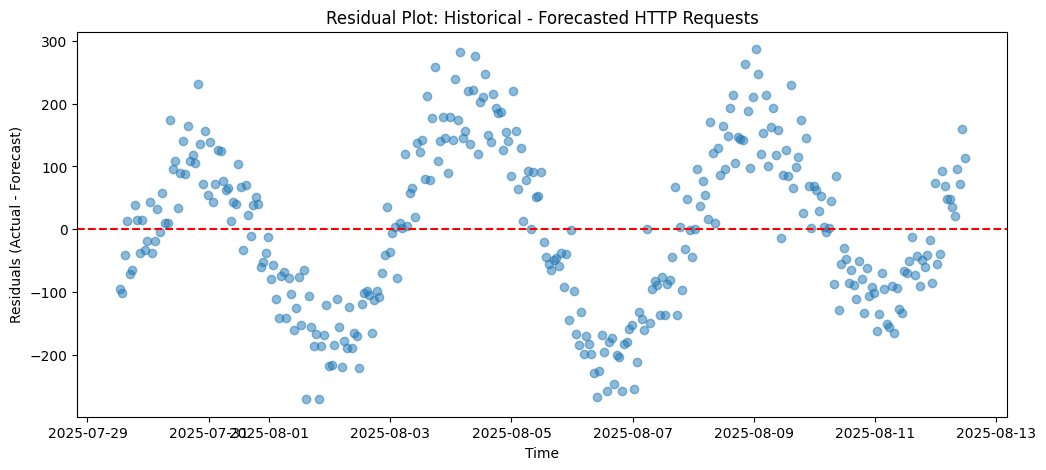

In [23]:
# Residual Plot: Error between historical and forecasted (overlap period only)
merged = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='inner')
residuals = merged['y'] - merged['yhat']
plt.figure(figsize=(12,5))
plt.scatter(merged['ds'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Historical - Forecasted HTTP Requests')
plt.xlabel('Time')
plt.ylabel('Residuals (Actual - Forecast)')
plt.show()

**Residual Plot Explanation:**

The residual plot shows the difference between actual and forecasted values for each timestamp where both exist. Unlike the time series plot, which shows both series together, the residual plot highlights where and when the model over- or under-predicts. Points above zero indicate under-prediction, while points below zero indicate over-prediction. This helps diagnose model accuracy and bias.

**Can model training improve residuals?**

Yes, you can often improve prediction accuracy and reduce residuals by:

- **Increasing training data:** More historical data helps Prophet learn seasonality and trends better.
- **Tuning model parameters:** Add custom seasonality (e.g., daily, weekly), adjust changepoint settings, or try different growth options.
- **Reducing noise in data:** If possible, use cleaner data or apply smoothing.
- **Feature engineering:** Add holidays, events, or other relevant regressors if available.

Try retraining the model with more data or adjusted parameters and compare the new residual plot. This should result in more points closer to zero, indicating better predictions.

In [24]:
# Interactive Plot: Plotly line chart for historical and forecasted data
try:
    import plotly.graph_objs as go
    from plotly.subplots import make_subplots
    import nbformat
    from packaging.version import Version

    if Version(nbformat.__version__) < Version('4.2.0'):
        raise ImportError('nbformat>=4.2.0 is required for Plotly rendering in notebooks.')

    fig = make_subplots(specs=[[{'secondary_y': False}]])
    fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Historical'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='orange')))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Bound', line=dict(color='orange', dash='dot'), showlegend=False))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Bound', line=dict(color='orange', dash='dot'), showlegend=False))
    fig.update_layout(title='Interactive HTTP Request Forecast', xaxis_title='Time', yaxis_title='Requests per hour')
    fig.show()
except ImportError as e:
    print('Plotly interactive rendering requires nbformat>=4.2.0. Please run !pip install nbformat --upgrade and restart the kernel.')
    print('Error:', e)

**Interactive Plot Explanation:**

This interactive Plotly plot overlays historical and forecasted HTTP requests, including confidence intervals. Unlike static time series plots, it allows zooming, panning, and hovering to inspect specific data points and intervals. This is especially useful for exploring large datasets and communicating results interactively.

## Improving Prophet Model: More Data & Seasonality

In [25]:
# Simulate more historical HTTP request data (hourly for past 60 days)
np.random.seed(42)
dates2 = pd.date_range(end=pd.Timestamp.now(), periods=60*24, freq='h')
base2 = 1000 + 200 * np.sin(np.linspace(0, 24*np.pi, len(dates2)))
trend2 = np.linspace(0, 600, len(dates2))
noise2 = np.random.normal(0, 50, len(dates2))
requests2 = base2 + trend2 + noise2
df2 = pd.DataFrame({'ds': dates2, 'y': requests2})

In [26]:
# Retrain Prophet with more data and explicit daily seasonality
model2 = Prophet(daily_seasonality=True)
model2.fit(df2)
future2 = model2.make_future_dataframe(periods=24, freq='h')
forecast2 = model2.predict(future2)

11:42:31 - cmdstanpy - INFO - Chain [1] start processing
11:42:31 - cmdstanpy - INFO - Chain [1] done processing
11:42:31 - cmdstanpy - INFO - Chain [1] done processing


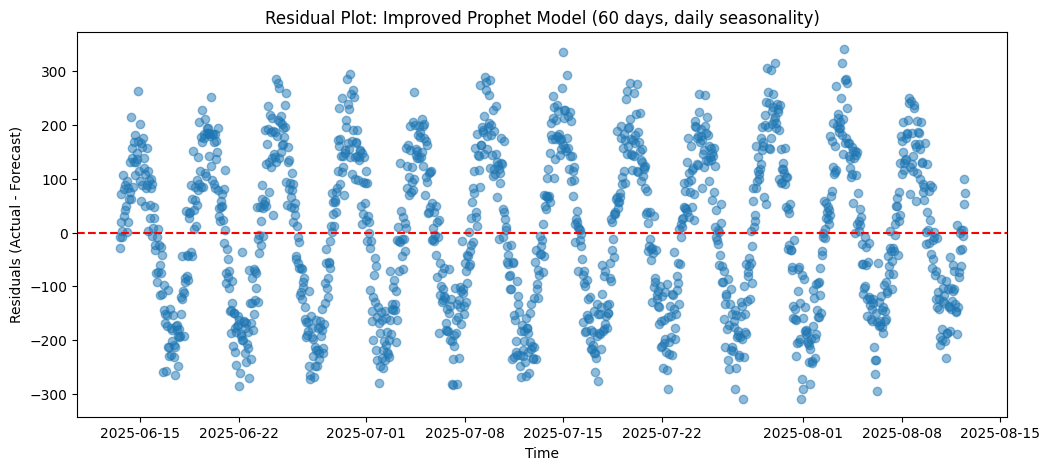

In [27]:
# Residual Plot: Improved model (overlap period only)
merged2 = pd.merge(df2, forecast2[['ds', 'yhat']], on='ds', how='inner')
residuals2 = merged2['y'] - merged2['yhat']
plt.figure(figsize=(12,5))
plt.scatter(merged2['ds'], residuals2, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Improved Prophet Model (60 days, daily seasonality)')
plt.xlabel('Time')
plt.ylabel('Residuals (Actual - Forecast)')
plt.show()

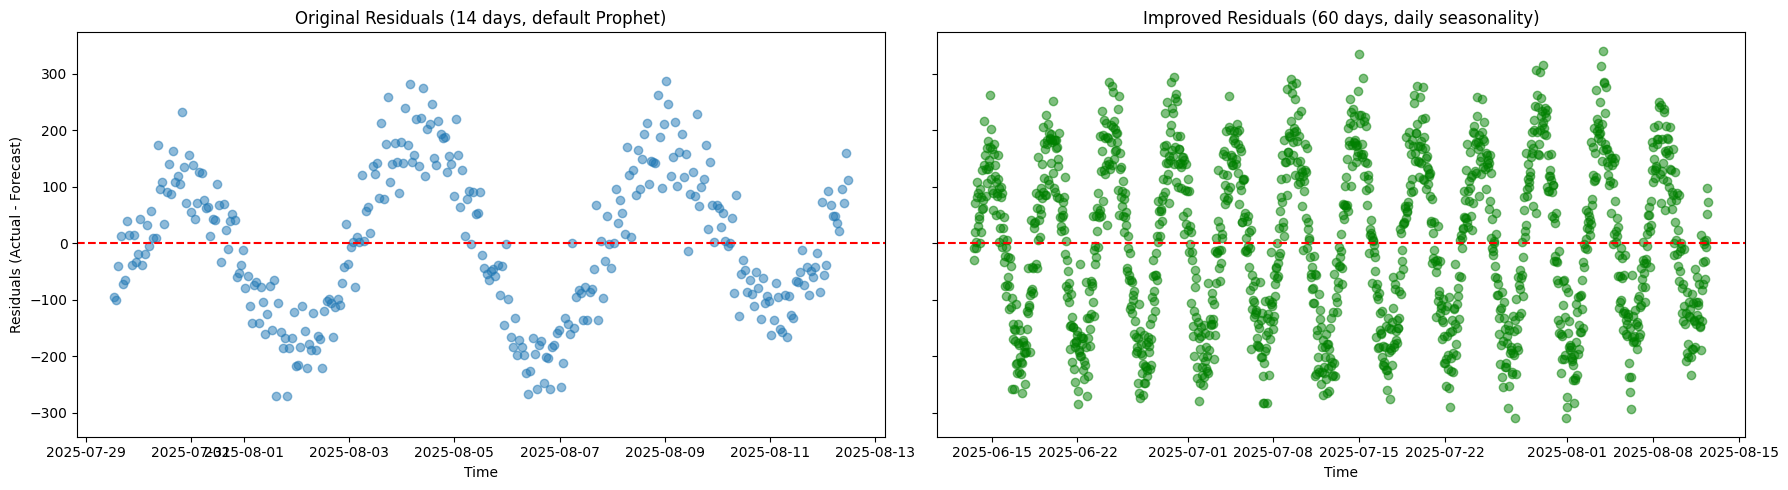

In [28]:
# Compare original and improved residual plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18,5), sharey=True)

# Original residuals
axes[0].scatter(merged['ds'], residuals, alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Original Residuals (14 days, default Prophet)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Residuals (Actual - Forecast)')

# Improved residuals
axes[1].scatter(merged2['ds'], residuals2, alpha=0.5, color='green')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Improved Residuals (60 days, daily seasonality)')
axes[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

**Residual Comparison Explanation:**

This side-by-side plot visually compares the original and improved residuals. The left plot shows residuals from the initial Prophet model (14 days, default settings), while the right plot shows residuals after retraining with more data and explicit daily seasonality. More points near zero in the improved plot indicate better prediction accuracy.